# NOT ENOUGH SEEDS

In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")
print(os.getcwd())

Started
/mnt/brain5/scratch/wcarvalh/projects/rljax/analysis


In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,
        njobs=16,
        verbose=1,
    )
)

In [10]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        "respawn_baselines_2/*/*", # usfa, rd21, lstm, farmflat
        "farmflat/*/*",
    ],
    config_file='config.json',

)
run_data.load_settings(config_search='config.json')
_dict =run_data.varied(show=True)

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines_2/*/*
get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farmflat/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines_2/*/*: 9
/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farmflat/*/*: 8


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 93696.67it/s]

Added: 0
{'agent': {'r2d1', 'usfa_lstm', 'usfa_farmflat', 'usfa_farmflat_model', 'usfa'},
 'cumulant_const': {'concat', 'delta_concat'},
 'module_model_coeff': {0.0, 0.1},
 'reward_coeff': {0.0001, 0.001},
 'seperate_value_params': {False, True}}


,module_model_coeff,reward_coeff,seperate_value_params,agent,cumulant_const
0,NaN,NaN,None,r2d1,None
1,NaN,NaN,None,usfa,None
2,NaN,0.0010,True,usfa_farmflat,concat
3,NaN,0.0010,None,usfa_lstm,concat
4,0.0,0.0001,False,usfa_farmflat_model,delta_concat
5,0.1,0.0001,False,usfa_farmflat_model,delta_concat
0,NaN,0.0001,False,usfa_farmflat_model,delta_concat


In [8]:
run_data.load_tensorboard(
    njobs=8,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    load_paths=True,
)

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines_2/*/*
get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farmflat/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines_2/*/*: 9
/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farmflat/*/*: 8


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 88795.98it/s]


Added: 0


settings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.69s/it]

Keys:
['r2d1/EvaluatorSteps',
 'r2d1/StepsPerSecond',
 'r2d1/ActorSteps',
 'r2d1/LearnerSteps',
 'actor/StepsPerSecond',
 'actor/EpisodeReturn',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/EvaluatorSteps',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/LearnerSteps',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/EpisodeReturn',
 'evaluator/ActorSteps',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/LearnerSteps',
 'usfa/StepsPerSecond',
 'usfa/ActorSteps',
 'usfa/EvaluatorSteps',
 'usfa/LearnerSteps']


In [11]:
key_with_legend = '1,1,0,0'
filter_key =  '-1,1,-1,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=f'evaluator/0.Task/{key_with_legend}/EpisodeReturn',
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='max',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
)

# Best

,num_seeds,reward_coeff,seperate_value_params,agent,cumulant_const
0,1,0.0010,True,usfa_farmflat,concat
1,2,0.0001,False,usfa_farmflat_model,delta_concat
2,3,NaN,None,usfa,None


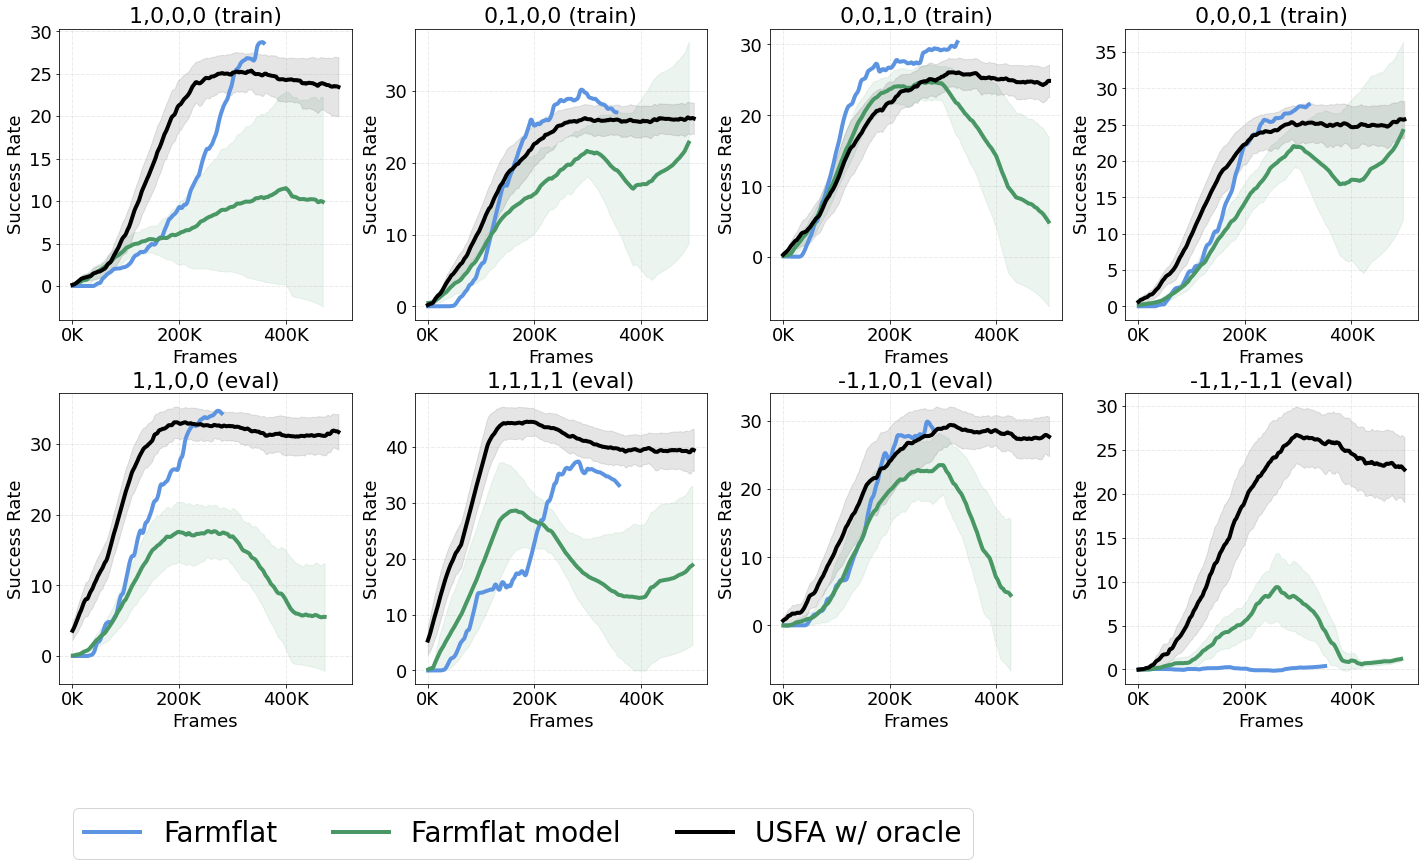

In [14]:
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    maxcols=4,
    data_filters=[
        dict(
            settings=dict(agent='usfa_farmflat'),
            label='Farmflat',
            color='blue',
        ),
        dict(
            settings=dict(agent='usfa_farmflat_model'),
            label='Farmflat model',
            color='green',
        ),        # dict(
        #     settings=dict(agent='usfa_farm_model'),
        #     label='Modular USFA',
        #     color='red',
        # ),
        dict(
            settings=dict(agent='usfa'),
            label='USFA w/ oracle',
            color='black',
        ),
    ],
    display_settings=['agent'],
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.65), 
                ncol=4,
                ),
    fig_kwargs=dict(legend_text_size=28),
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          xmax=500e3,
                          n_samples=400,
                          rolling=100,
                          std_alpha=.1,
                          err_fn=lambda h: h.grouped.sem(),
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)